In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [9]:
plt.rc("font",family="AppleGothic")
plt.rc("axes",unicode_minus=False)

In [10]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [11]:
df = pd.read_csv('./인구카드코로나.csv')

In [12]:
# 날짜 datetime으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])
# 요일 컬럼 추가
df['요일'] = df.날짜.dt.dayofweek
#(0 - 월, 6 - 일)
# 이슈 컬럼 추가
dates = [pd.date_range('20200310', '20200313'), pd.date_range('20200507', '20200520'),
          pd.date_range('20200525', '20200529'), pd.date_range('20200604', '20200614')]
datelist = []
for range in dates:
    for date in range:
        datelist.append(date)
        
df['이슈'] = df['날짜'].map(lambda x: 1 if x in datelist else 0)

In [13]:
df = df[(df['업계'] != '기타') & (~df['업종명'].isin(['카지노', 'P2P송금', '콘도']))]

In [14]:
df.head()

,날짜,업종명,시군구,판매건수,매출액,유동인구,업계,확진자수,요일,이슈
0,2020-01-04,특급호텔,강남구,549,146315331,4268654,숙박,0,5,0
1,2020-01-04,특급호텔,중구,928,239811377,1669677,숙박,0,5,0
2,2020-01-04,1급호텔,중구,38,6941145,1669677,숙박,0,5,0
3,2020-01-04,기타숙박업,강남구,444,57200876,4268654,숙박,0,5,0
4,2020-01-04,기타숙박업,강동구,180,7928000,2425402,숙박,0,5,0


In [15]:
dummies = pd.get_dummies(df, columns = ['업종명','시군구'], drop_first = False)
dummies

,날짜,판매건수,매출액,유동인구,업계,확진자수,요일,이슈,업종명_1급호텔,업종명_2급호텔,...,시군구_성동구,시군구_성북구,시군구_송파구,시군구_양천구,시군구_영등포구,시군구_용산구,시군구_은평구,시군구_종로구,시군구_중구,시군구_중랑구
0,2020-01-04,549,146315331,4268654,숙박,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-04,928,239811377,1669677,숙박,0,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2020-01-04,38,6941145,1669677,숙박,0,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,2020-01-04,444,57200876,4268654,숙박,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-04,180,7928000,2425402,숙박,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357842,2020-06-14,548,59431500,1848525,패션&뷰티,1,6,1,0,0,...,0,0,0,0,0,1,0,0,0,0
357843,2020-06-14,684,36445600,1436435,패션&뷰티,1,6,1,0,0,...,0,0,0,0,0,0,1,0,0,0
357844,2020-06-14,1184,79018656,1269669,패션&뷰티,0,6,1,0,0,...,0,0,0,0,0,0,0,1,0,0
357845,2020-06-14,7300,447805275,1166980,패션&뷰티,0,6,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
dummies.drop(['매출액','날짜','업계'], axis = 1, inplace = True)

In [17]:
x = dummies.drop('판매건수', axis = 1)
y = dummies['판매건수']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state = 42)
print(X_train, X_test, y_train, y_test)

           유동인구  확진자수  요일  이슈  업종명_1급호텔  업종명_2급호텔  업종명_CATV홈쇼핑  업종명_LPG  \
72598   3720047     1   5   0         0         0            0        0   
68024   3592992     1   3   0         0         0            0        0   
303033  1889115     1   2   1         0         0            0        0   
7674    5169595     0   1   0         0         0            0        0   
282115  1794224     0   4   0         0         0            0        0   
...         ...   ...  ..  ..       ...       ...          ...      ...   
135666  2322530     0   3   0         0         0            0        0   
292984  1595263     0   0   0         0         0            0        0   
149441  1685287     0   3   0         0         0            0        0   
166458  1480749     0   5   0         0         0            0        0   
138177  1588957     0   5   0         0         0            0        0   

        업종명_PG상품권  업종명_가구  ...  시군구_성동구  시군구_성북구  시군구_송파구  시군구_양천구  시군구_영등포구  \
72598           0  

In [19]:
X_test

,유동인구,확진자수,요일,이슈,업종명_1급호텔,업종명_2급호텔,업종명_CATV홈쇼핑,업종명_LPG,업종명_PG상품권,업종명_가구,...,시군구_성동구,시군구_성북구,시군구_송파구,시군구_양천구,시군구_영등포구,시군구_용산구,시군구_은평구,시군구_종로구,시군구_중구,시군구_중랑구
154837,3109187,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56592,2389359,0,4,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
350852,895034,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341156,3495286,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
246860,1299753,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1484281,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
210029,2003498,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321314,1180385,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111219,1661084,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_train

,유동인구,확진자수,요일,이슈,업종명_1급호텔,업종명_2급호텔,업종명_CATV홈쇼핑,업종명_LPG,업종명_PG상품권,업종명_가구,...,시군구_성동구,시군구_성북구,시군구_송파구,시군구_양천구,시군구_영등포구,시군구_용산구,시군구_은평구,시군구_종로구,시군구_중구,시군구_중랑구
72598,3720047,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68024,3592992,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303033,1889115,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7674,5169595,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282115,1794224,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135666,2322530,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292984,1595263,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
149441,1685287,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166458,1480749,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics    
 
# 학습 진행
rf = RandomForestRegressor(random_state = 42, n_estimators=10)
rf.fit(X_train, y_train)

# 예측
y_pred = rf.predict(X_test)

print(y_pred)

# 정확도 확인
error_ = y_pred - y_test

print(f'RMSE: {np.sqrt(np.mean(error_**2))}')

[180.8  19.7   1.4 ...  20.6  44.9  42.9]
RMSE: 7549.374809273332


In [15]:
from sklearn.model_selection import  cross_val_score,GridSearchCV
clf_score = cross_val_score(rf, X_train, y_train, cv=5)
print(clf_score)
clf_score.mean()

[0.80981736 0.8391239  0.85642064 0.84558701 0.74124493]


0.8184387669272363

In [32]:
regressor = RandomForestRegressor(random_state = 42)

parameters = [{'n_estimators' : [100,150], 'max_features' : [0.33]}]

grid_search = GridSearchCV(estimator = regressor, param_grid = parameters, cv = 5, verbose = 2)

grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_

best_accuracy = grid_search.best_score_

print(best_parameters, best_accuracy)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] max_features=0.33, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. max_features=0.33, n_estimators=100, total= 3.9min
[CV] max_features=0.33, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s


[CV] .............. max_features=0.33, n_estimators=100, total= 3.8min
[CV] max_features=0.33, n_estimators=100 .............................
[CV] .............. max_features=0.33, n_estimators=100, total= 3.8min
[CV] max_features=0.33, n_estimators=100 .............................
[CV] .............. max_features=0.33, n_estimators=100, total= 4.0min
[CV] max_features=0.33, n_estimators=100 .............................
[CV] .............. max_features=0.33, n_estimators=100, total= 4.1min
[CV] max_features=0.33, n_estimators=150 .............................
[CV] .............. max_features=0.33, n_estimators=150, total= 6.1min
[CV] max_features=0.33, n_estimators=150 .............................
[CV] .............. max_features=0.33, n_estimators=150, total= 5.8min
[CV] max_features=0.33, n_estimators=150 .............................
[CV] .............. max_features=0.33, n_estimators=150, total= 6.1min
[CV] max_features=0.33, n_estimators=150 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 49.3min finished


{'max_features': 0.33, 'n_estimators': 100} 0.8437314491792696


In [16]:
#최종 모형 검증
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics    
 
# 학습 진행
rf_test = RandomForestRegressor(random_state = 42, n_estimators=100, max_features= 0.333, min_samples_split = 5)
rf_test.fit(X_train, y_train)

# 예측
y_pred_test = rf_test.predict(X_test)

print(y_pred_test)

# 정확도 확인
error_test = y_pred_test - y_test

print(f'RMSE: {np.sqrt(np.mean(error_test**2))}')

[169.2257619   18.96172619   1.78130952 ...  20.54395418  40.36142063
  64.16045635]
RMSE: 6748.414054324048


In [17]:
from sklearn.model_selection import  cross_val_score,GridSearchCV
clf_score = cross_val_score(rf_test, X_train, y_train, cv=5)
print(clf_score)
clf_score.mean()

[0.89177353 0.85319724 0.88706664 0.87847865 0.76228746]


0.8545607045740237

In [18]:
#최종 모형 검증
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics    
 
# 학습 진행
rf_final = RandomForestRegressor(random_state = 42, n_estimators=100, max_features= 0.333, min_samples_split = 20)
rf_final.fit(X_train, y_train)

# 예측
y_pred_final = rf_final.predict(X_test)

print(y_pred_final)

# 정확도 확인
error_final = y_pred_final - y_test

print(f'RMSE: {np.sqrt(np.mean(error_final**2))}')

[180.65062367  20.5684087    2.08150043 ...  22.35306549  36.64922737
  65.7889288 ]
RMSE: 6572.8431995389565


In [19]:
from sklearn.model_selection import  cross_val_score,GridSearchCV
clf_score = cross_val_score(rf_final, X_train, y_train, cv=5)
print(clf_score)
clf_score.mean()

[0.90460783 0.83713321 0.88687961 0.87720914 0.76547489]


0.8542609382788751

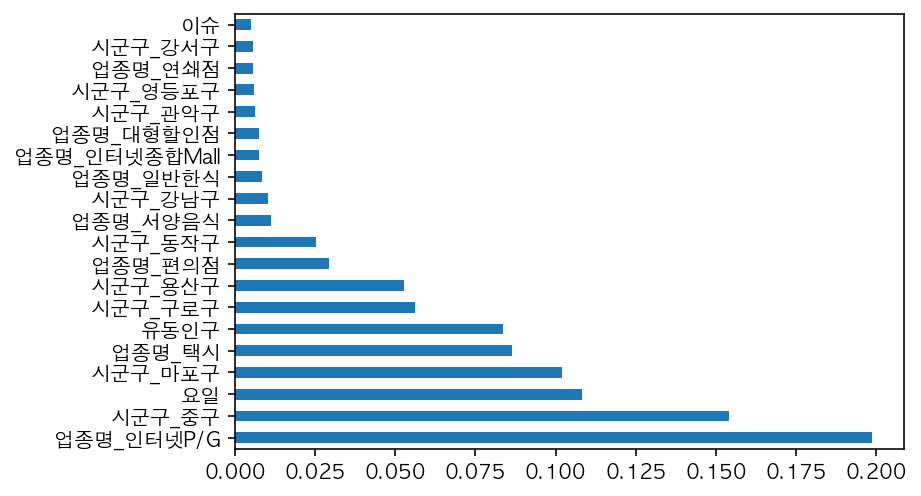

In [22]:
# 중요도
cols = X_train.columns
feat_imp = pd.Series(data = rf_final.feature_importances_, index = cols).sort_values(ascending = False).head(20)
feat_imp
# 그래프
feat_imp.plot.barh()